<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# PCA Lab: Speed Dating

_Authors: Kiefer Katovich (SF)_

---

Let's practice PCA using a dataset from Kaggle! PCA is often used to simplify data, reduce noise, and find unmeasured "latent variables". So, it is important to spend the time to understand what's going on.

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.
- Predict whether a speed dater likes reading, based on the dater's other likes.

---

### Dataset

The dataset we are using for this lab is a subset of the [much more detailed speed dating dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (successes with or opinions of other individuals). It also contains no "follow-up" information where individuals are re-asked the same questions about themselves. All it contains are things that an individual enjoys doing, their ratings of themselves on how desireable they are, and how they think others rate them on desireability.

Specifically, the columns in the data are outlined below:

FieldName|Description
---------|-----------
    subject_id                   |   unique individual identifier
    wave                         |   meetup id
    like_sports                  |   enjoyment of participating in sports
    like_tvsports                |   enjoyment of watching sports on tv
    like_exercise                |   enjoyment of exercise
    like_food                    |   enjoyment of food
    like_museums                 |   enjoyment of museums
    like_art                     |   enjoyment of art
    like_hiking                  |   enjoyment of hiking
    like_gaming                  |   enjoyment of playing games
    like_clubbing                |   enjoyment of going clubbing/partying
    like_reading                 |   enjoyment of reading
    like_tv                      |   enjoyment of tv in general
    like_theater                 |   enjoyment of the theater (plays, musicals, etc.)
    like_movies                  |   enjoyment of movies
    like_concerts                |   enjoyment of concerts
    like_music                   |   enjoyment of music
    like_shopping                |   enjoyment of shopping
    like_yoga                    |   enjoyment of yoga
    subjective_attractiveness    |   how attractive they rate themselves
    subjective_sincerity         |   how sincere they rate themselves
    subjective_intelligence      |   how intelligent they rate themselves
    subjective_fun               |   how fun they rate themselves
    subjective_ambition          |   how ambitious they rate themselves
    objective_attractiveness     |   percieved rating others would give them on how attractive they are
    objective_sincerity          |   perceived rating others would give them on how sincere they are
    objective_intelligence       |   perceived rating others would give them on how intelligent they are
    objective_fun                |   perceived rating others would give them on how fun they are
    objective_ambition           |   perceived rating others would give them on how ambitious they are
    
There are 551 subjects total.

---

### 1. Load packages

In [71]:
#http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [69]:
from sklearn.decomposition import PCA

---

### 2. Load and clean speed dating data

- Remove columns with over 200 missing values.
- Then, remove rows with missing values.
- Verify no rows contain NaNs.

In [20]:
sd = pd.read_csv('./datasets/speed_dating.csv')

# A:

In [21]:
# A:
sd.isnull().sum()

subject_id                     0
wave                           0
like_sports                    7
like_tvsports                  7
like_exercise                  7
like_food                      7
like_museums                   7
like_art                       7
like_hiking                    7
like_gaming                    7
like_clubbing                  7
like_reading                   7
like_tv                        7
like_theater                   7
like_movies                    7
like_concerts                  7
like_music                     7
like_shopping                  7
like_yoga                      7
subjective_attractiveness      9
subjective_sincerity           9
subjective_intelligence        9
subjective_fun                 9
subjective_ambition            9
objective_attractiveness     237
objective_sincerity          237
objective_intelligence       237
objective_fun                237
objective_ambition           237
dtype: int64

In [22]:
sd.drop(['objective_attractiveness','objective_sincerity','objective_intelligence',
               'objective_fun','objective_ambition'],axis=1,inplace=True )

In [23]:
sd.isnull().sum()

subject_id                   0
wave                         0
like_sports                  7
like_tvsports                7
like_exercise                7
like_food                    7
like_museums                 7
like_art                     7
like_hiking                  7
like_gaming                  7
like_clubbing                7
like_reading                 7
like_tv                      7
like_theater                 7
like_movies                  7
like_concerts                7
like_music                   7
like_shopping                7
like_yoga                    7
subjective_attractiveness    9
subjective_sincerity         9
subjective_intelligence      9
subjective_fun               9
subjective_ambition          9
dtype: int64

In [24]:
sd.dropna(inplace=True)

In [25]:
sd.isnull().sum()

subject_id                   0
wave                         0
like_sports                  0
like_tvsports                0
like_exercise                0
like_food                    0
like_museums                 0
like_art                     0
like_hiking                  0
like_gaming                  0
like_clubbing                0
like_reading                 0
like_tv                      0
like_theater                 0
like_movies                  0
like_concerts                0
like_music                   0
like_shopping                0
like_yoga                    0
subjective_attractiveness    0
subjective_sincerity         0
subjective_intelligence      0
subjective_fun               0
subjective_ambition          0
dtype: int64

---

### 3. EXAMPLE: Are the `subjective` columns correlated?

Here, we will understand how the `subjective` columns are correlated.

- Standardize the `subjective` columns.
- Visualize correlation using PairGrid.
- Visualize correlation using a heatmap.

#### 3.A. Standardize each column. This better allows the columns to be directly compared.

In [39]:
subjective_cols = [col for col in sd.columns if col.startswith('subjective')]
# A:sd
subjective=sd[subjective_cols]

In [41]:
from sklearn.preprocessing import StandardScaler

In [52]:
ss=StandardScaler()
subjective=pd.DataFrame(ss.fit_transform(subjective),columns=subjective_cols)

In [53]:
subjective.head()

,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition
0,-0.786472,-0.202716,-0.354194,0.193323,-0.323589
1,-0.066425,-2.329267,-0.354194,1.486916,-2.564932
2,0.653622,0.506135,0.564338,0.193323,0.236747
3,-0.066425,-0.202716,-1.272726,0.840119,0.236747
4,-0.786472,-3.746968,1.482870,-1.100270,0.236747


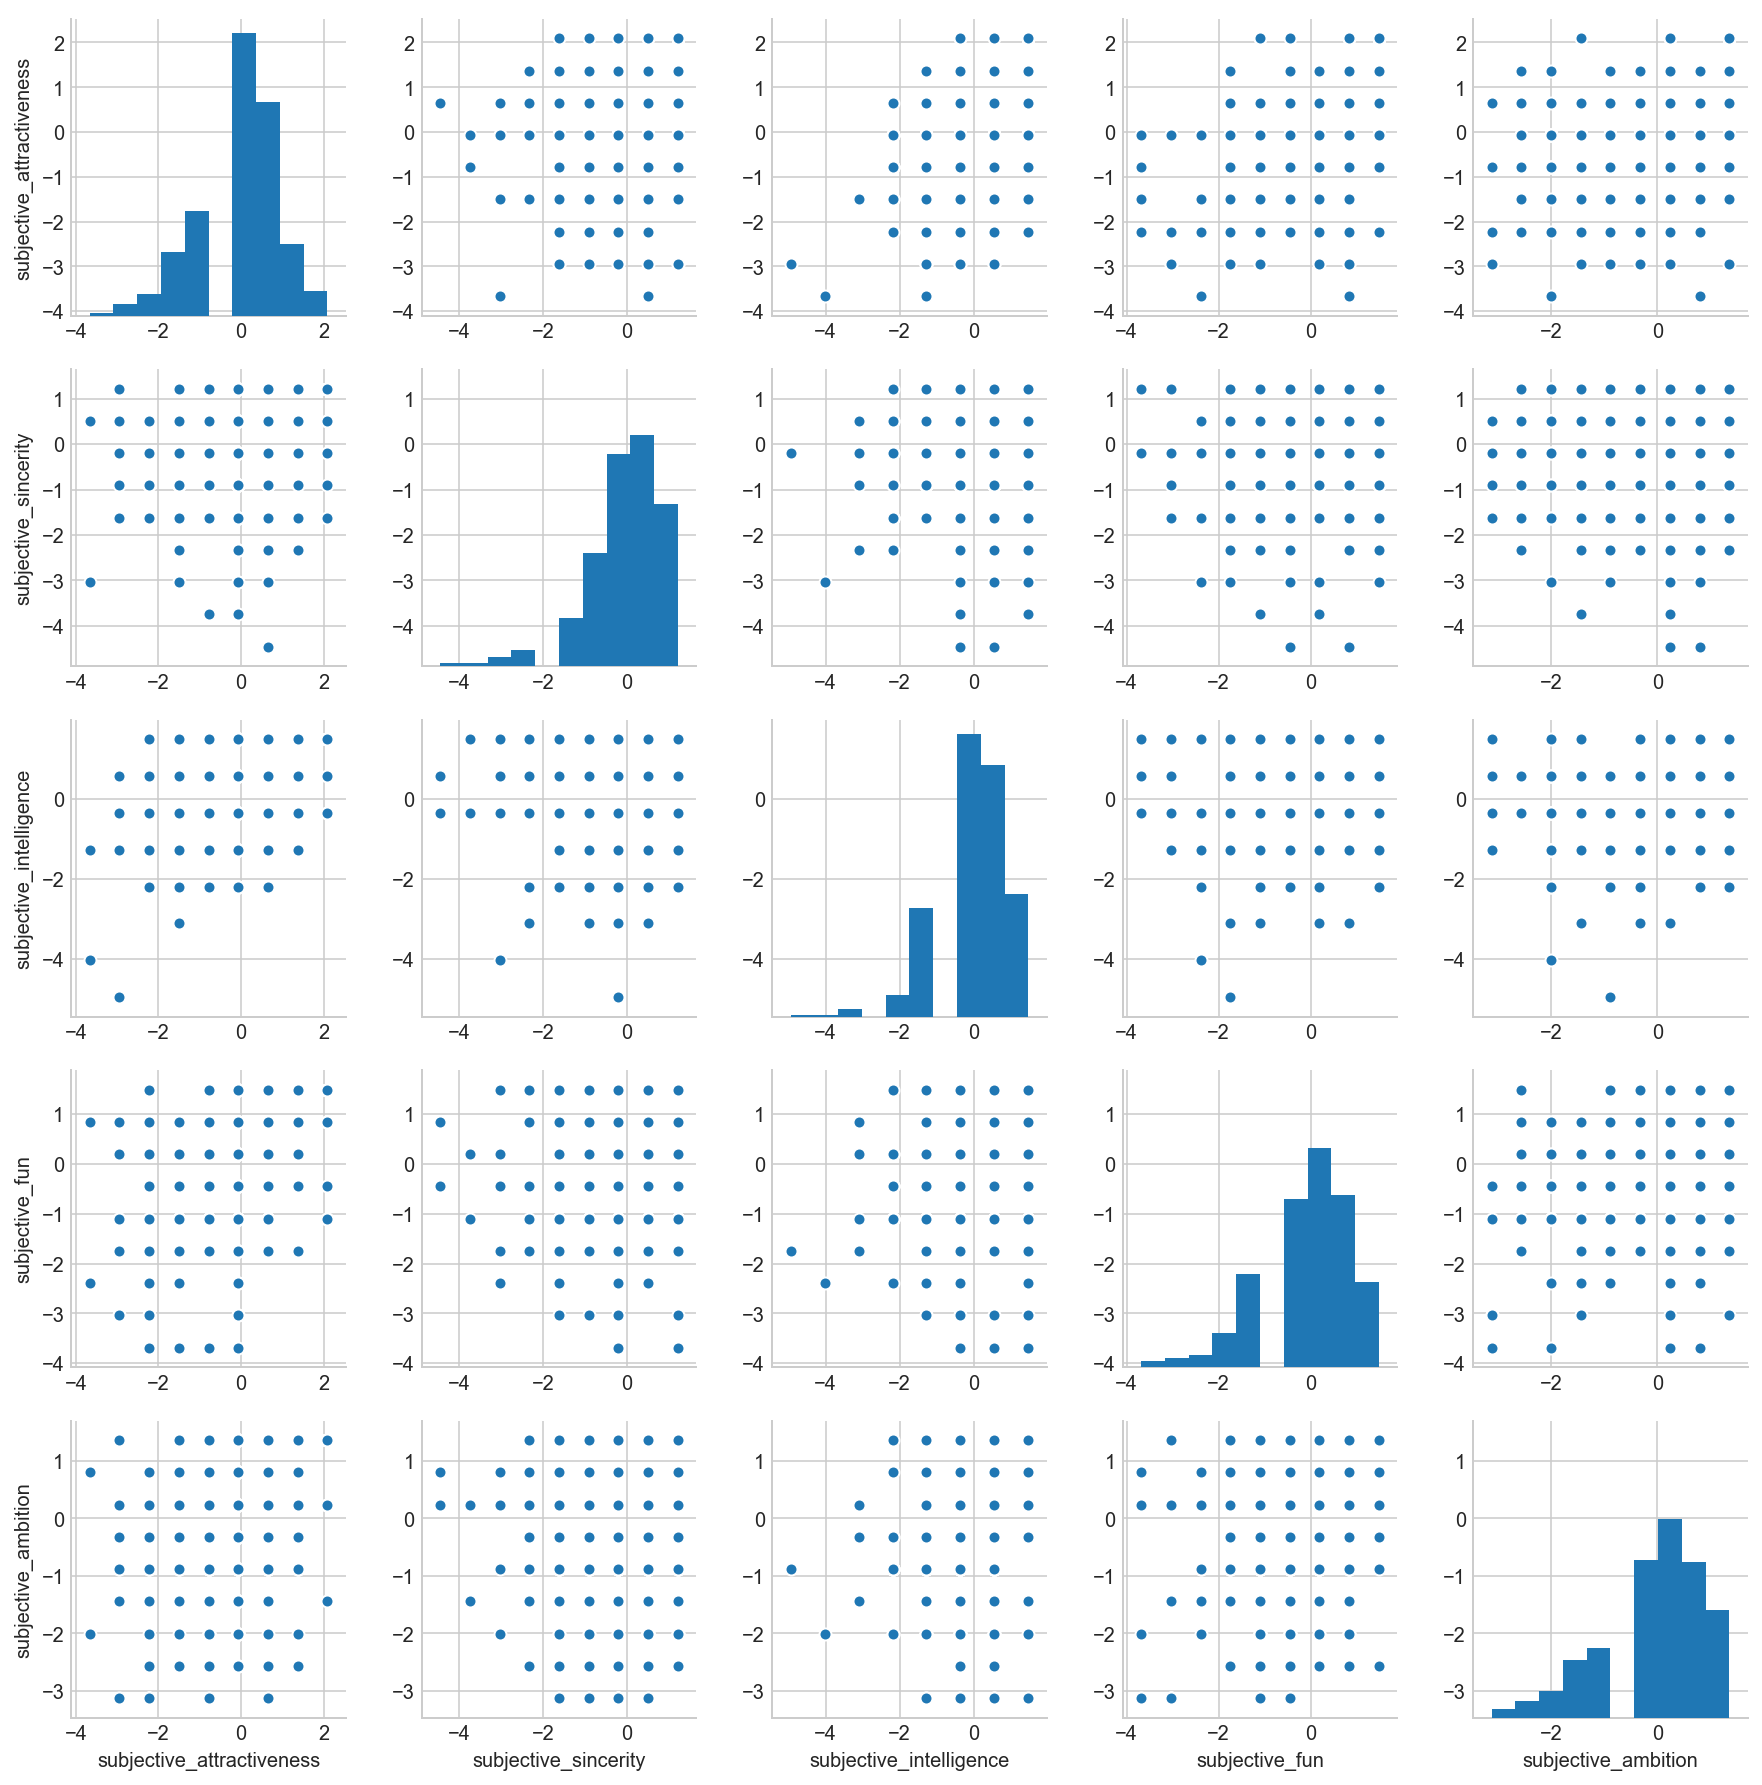

In [54]:
sns.pairplot(subjective)

In [55]:
corr=subjective.corr()

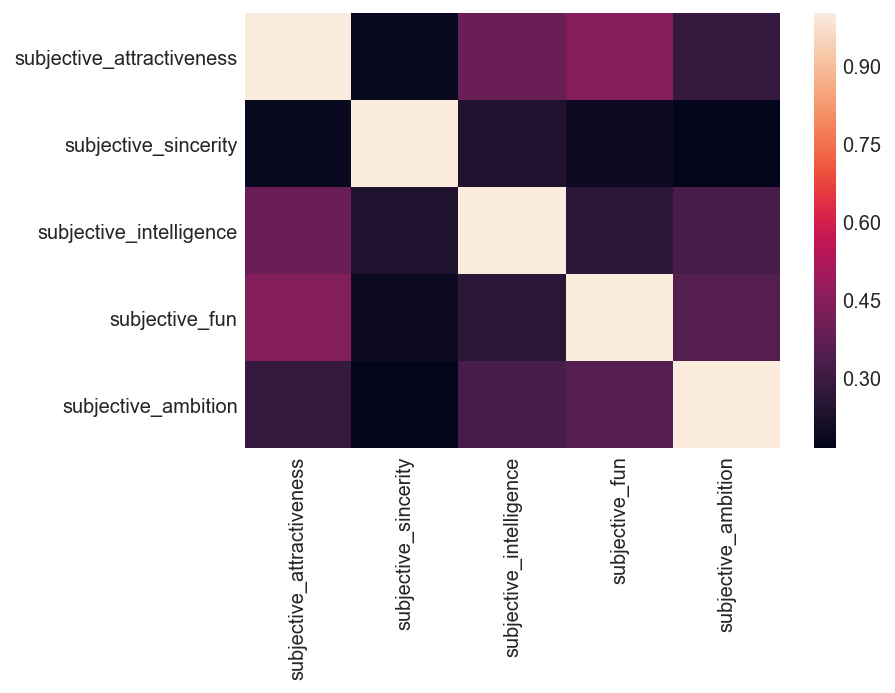

In [59]:
sns.heatmap(corr)

#### 3.B. Use a PairGrid to visualize correlation

/Users/yuesu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


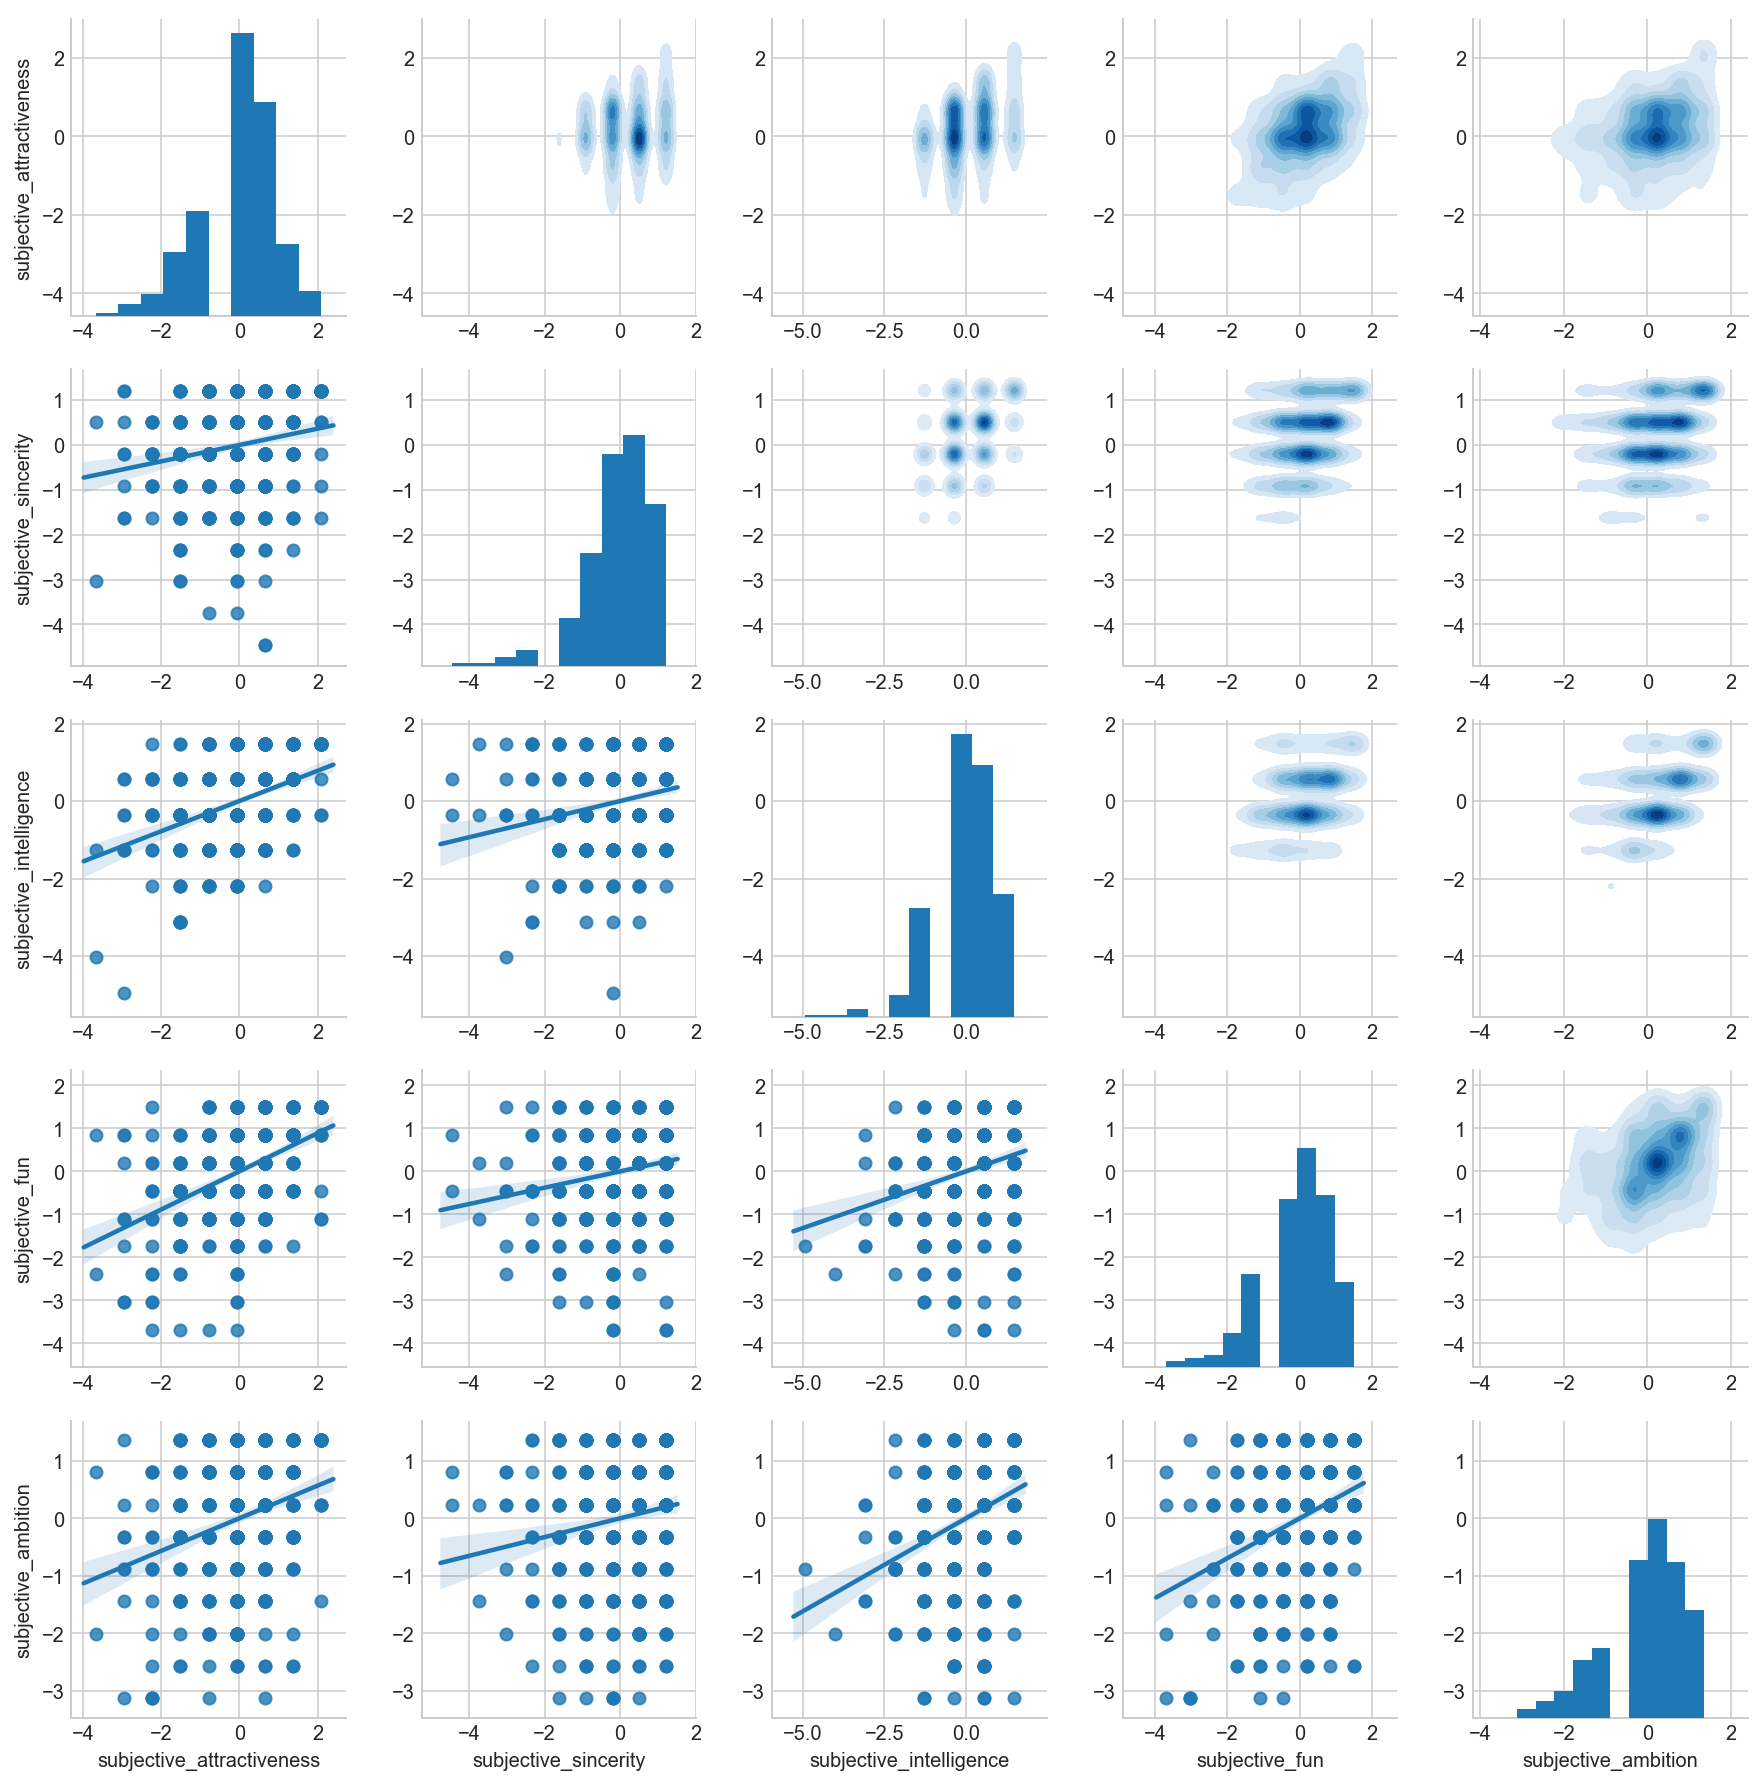

In [60]:
# subjective here is the data frame containing the subjective columns from above
g = sns.PairGrid(subjective)
g = g.map_lower(sns.regplot)    # regression plots in lower tri
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper tri
g = g.map_diag(plt.hist)        # histograms along diagonal

plt.show()

#### 3.C. Use a heatmap to visualize correlation

In [7]:
# A:

In [8]:
# A:

---

**Important: Did you ensure the results make intuitive sense?** If not, look at the results again. You should **always** interpret your results and ensure they "make sense" intutitively. If they are different than you expect, investigate why -- often your analysis or data is wrong.

> For example, the results show that believing you are attractive and fun are correlated. Would you expect believing you are intellectual and fun to have a higher or lower correlation? What do the results say?

---


### 4. Visualize some preference columns

Next, we will understand how some preference ratings are correlated. 

- Standardize each column in `preference_cols`.
- Visualize correlation using PairGrid.
- Visualize correlation using a heatmap.
- Do these results make sense intuitively? 

In [62]:
preference_cols = ['like_tvsports', 'like_sports', 'like_museums', 'like_theater', 'like_shopping']
sd_like = sd[preference_cols]

#### 4.A. Standardize each column in preference_cols

In [65]:
# A:
sd_like=pd.DataFrame(ss.fit_transform(sd_like),columns=preference_cols)


#### 4.B. Visualize correlation using PairGrid

/Users/yuesu/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


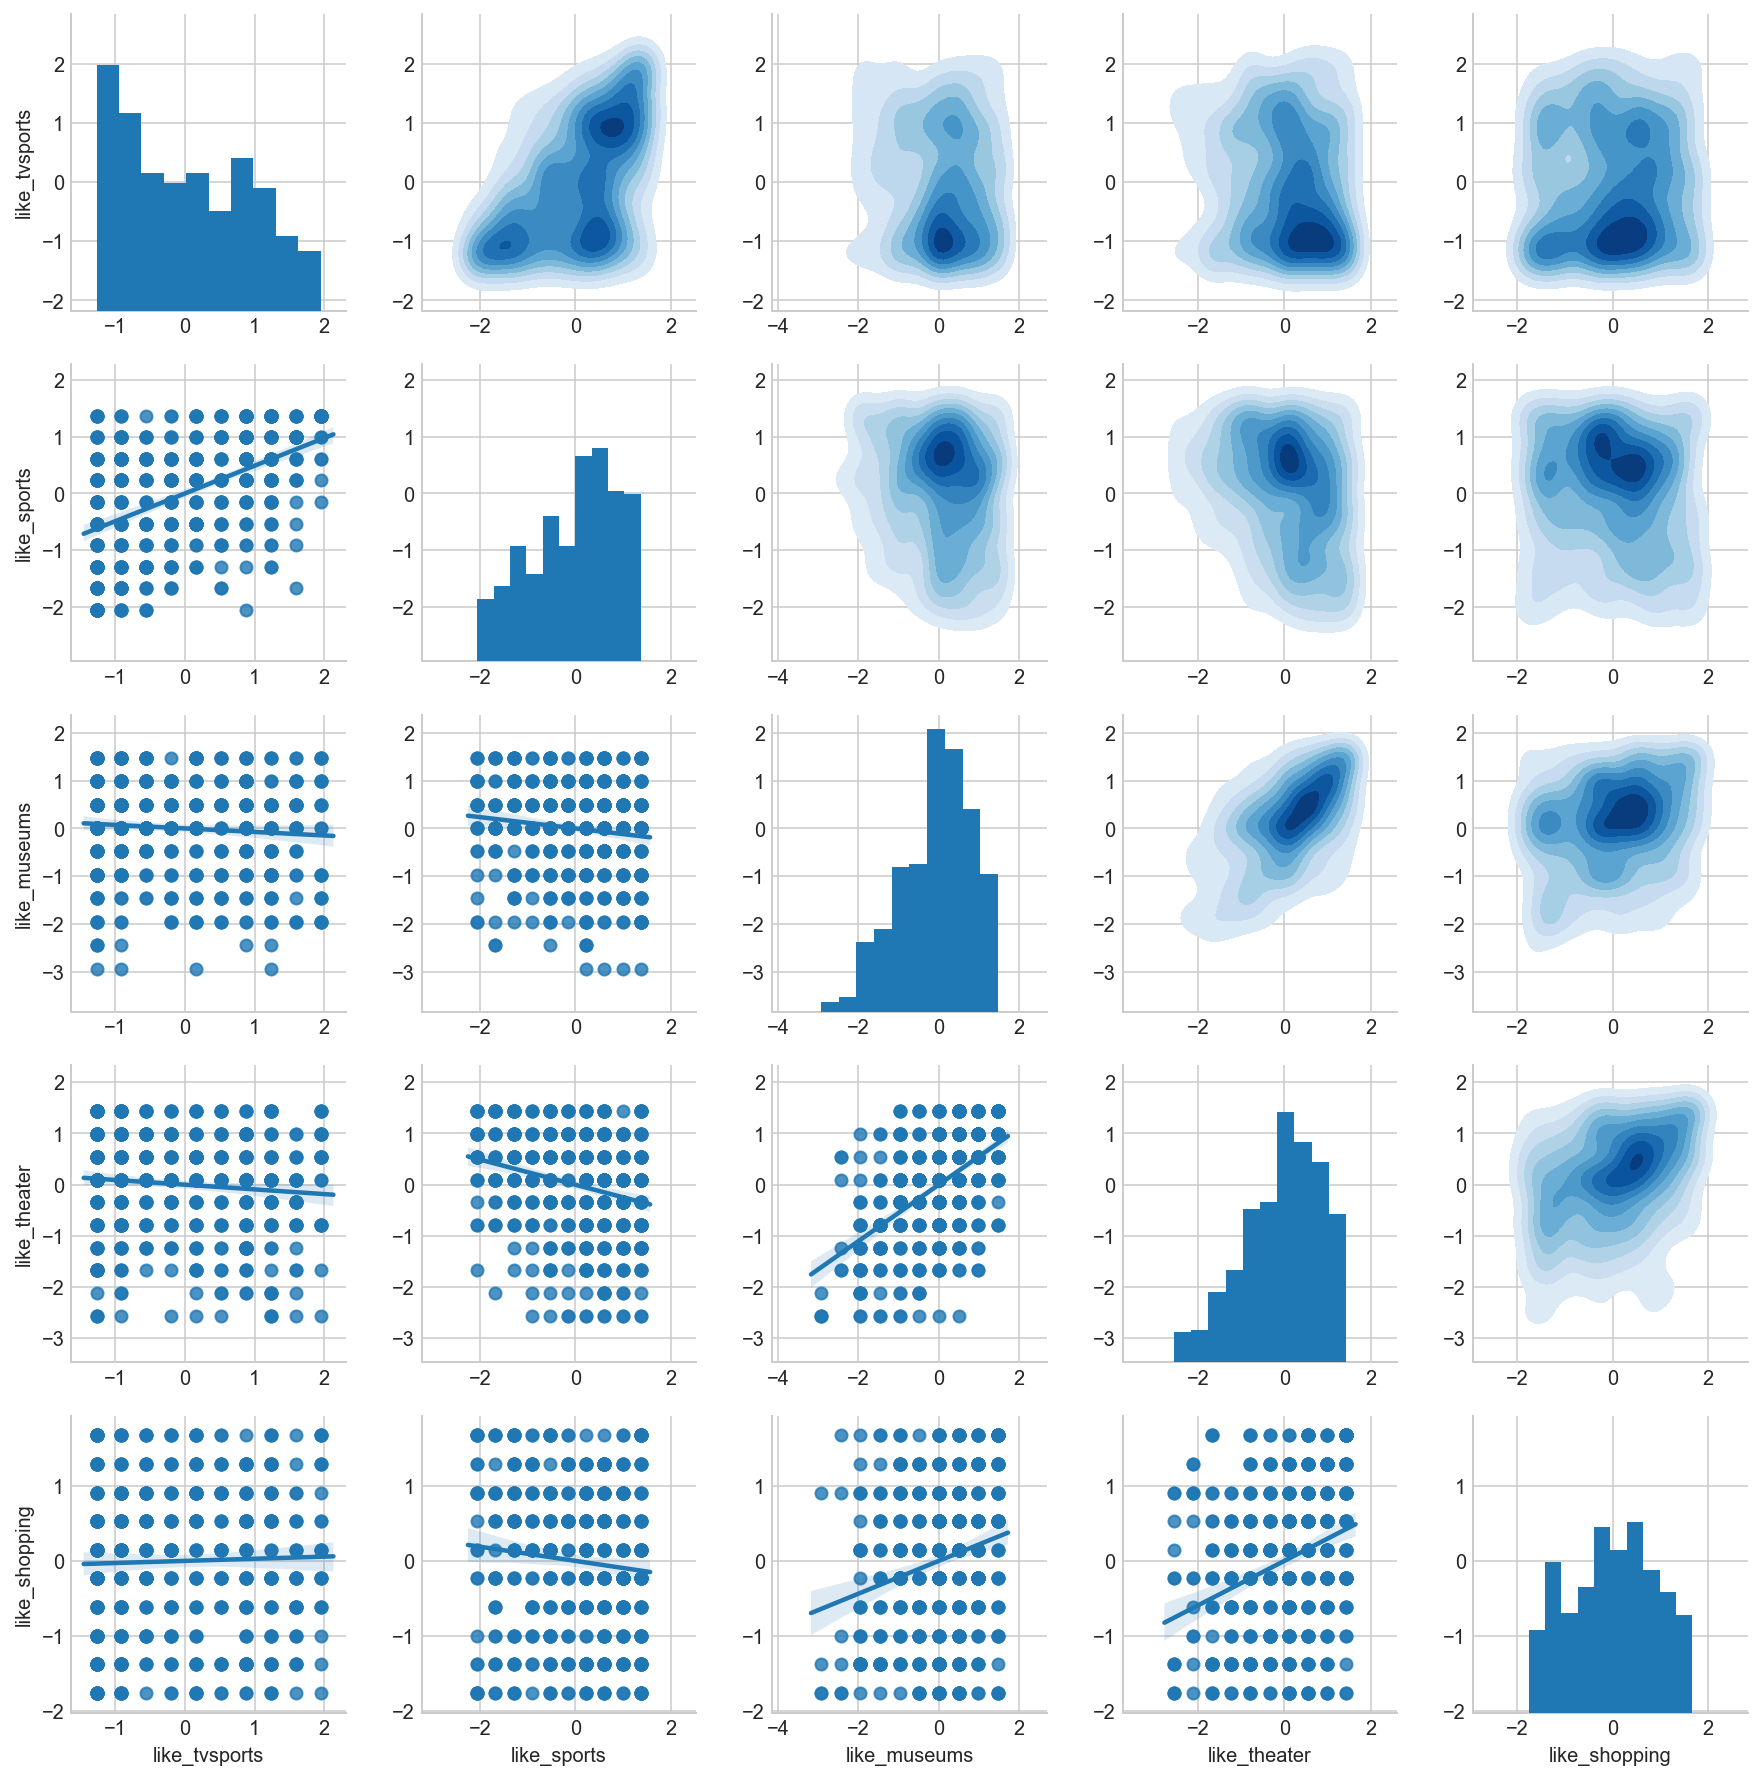

In [66]:
g = sns.PairGrid(sd_like)
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)
g = g.map_diag(plt.hist)

plt.show()

#### 4.C. Visualize correlation using a heatmap

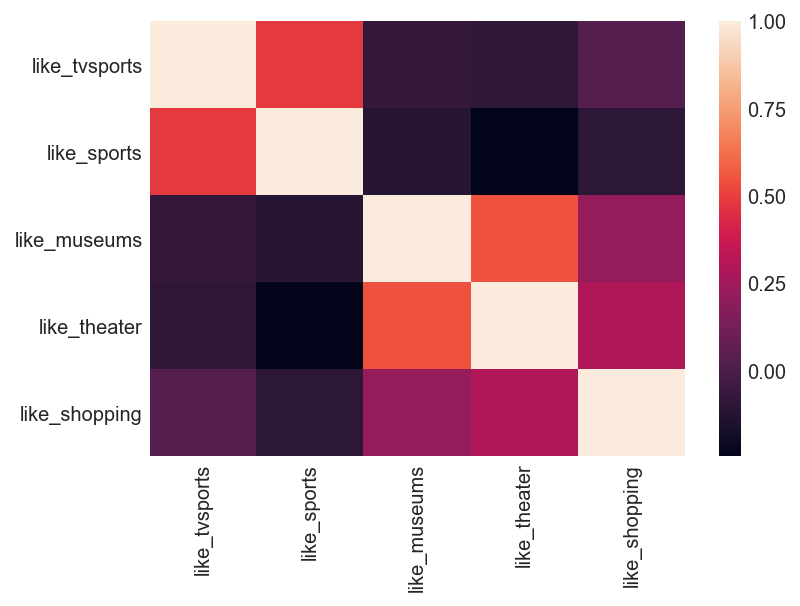

In [67]:
# A:
corr=sd_like.corr()
sns.heatmap(corr)

---

### 5. EXAMPLE: Fit PCA on the subjective ratings


In [70]:
subjective_pca = PCA(n_components=5)
subjective_pca.fit(subjective.values)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

---

#### 5.A. Look at principal component weighting vectors (eigenvectors)

The principal components, or eigenvectors, can be thought of as weightings on the original variables to transform them into the new feature space.

In [72]:
# A:
subj_components = subjective_pca.components_

In [73]:
subj_components

array([[-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711],
       [ 0.21825979, -0.90905995, -0.09768977,  0.27400972,  0.20334221],
       [-0.40202351, -0.14438615,  0.42289342, -0.48141404,  0.63791176],
       [ 0.34811874, -0.21377638,  0.64842003, -0.36104737, -0.53132783],
       [-0.64626278, -0.08749096,  0.41594928,  0.57330577, -0.27017855]])

---

#### 5.B. Look at the explained variance ratio

The principal components are ordered such that the first components have the largest variances. The values and their normalized equivalent in the explained variance ratio attribute tell you how much of the variance in the original data is encapsulated in the new component variables.

In [74]:
# A:
subj_exp_var_eigenvals = subjective_pca.explained_variance_
subj_exp_var_pct = subjective_pca.explained_variance_ratio_

print ('eigenvalues:', subj_exp_var_eigenvals, '\n')
print ('explained variance pct:', subj_exp_var_pct)

eigenvalues: [ 2.16041482  0.88925024  0.73820887  0.72229813  0.49907009] 

explained variance pct: [ 0.43128576  0.17752191  0.14736937  0.14419309  0.09962986]


---

#### 5.C. Transform the subjective data into principal component space

The transform function in the PCA will create you new component variable matrix.

In [75]:
# A:
subj_to_pcs = subjective_pca.transform(subjective.values)

This transformed our 5-dimensional data into vectors along its 5 principal components (with zero loss).
- Using these, we can now reduce the dimensionality of our data while minimizing loss.
- For example, taking only the first three eigenvectors accounts for $0.431 + 0.178 + 0.147 = 75.6\%$ of the variance.

In [76]:
# A:
subj_to_pcs[:,:3]

array([[ 0.673942  ,  0.03439955, -0.10382612],
       [ 1.35044583,  2.02341707, -2.13879048],
       [-0.94967947, -0.27146457, -0.03924025],
       ..., 
       [ 1.27802939,  0.74844718, -0.36801805],
       [ 2.37402987, -0.92246551,  0.44869284],
       [ 1.22960363,  0.72837603, -0.34611708]])

---

#### 5.D. PCA transformed features are not correlated

- Keep in mind that each column in the transformed data is no longer correlated!
- Compare this to the exploration above, where many columns were correlated.

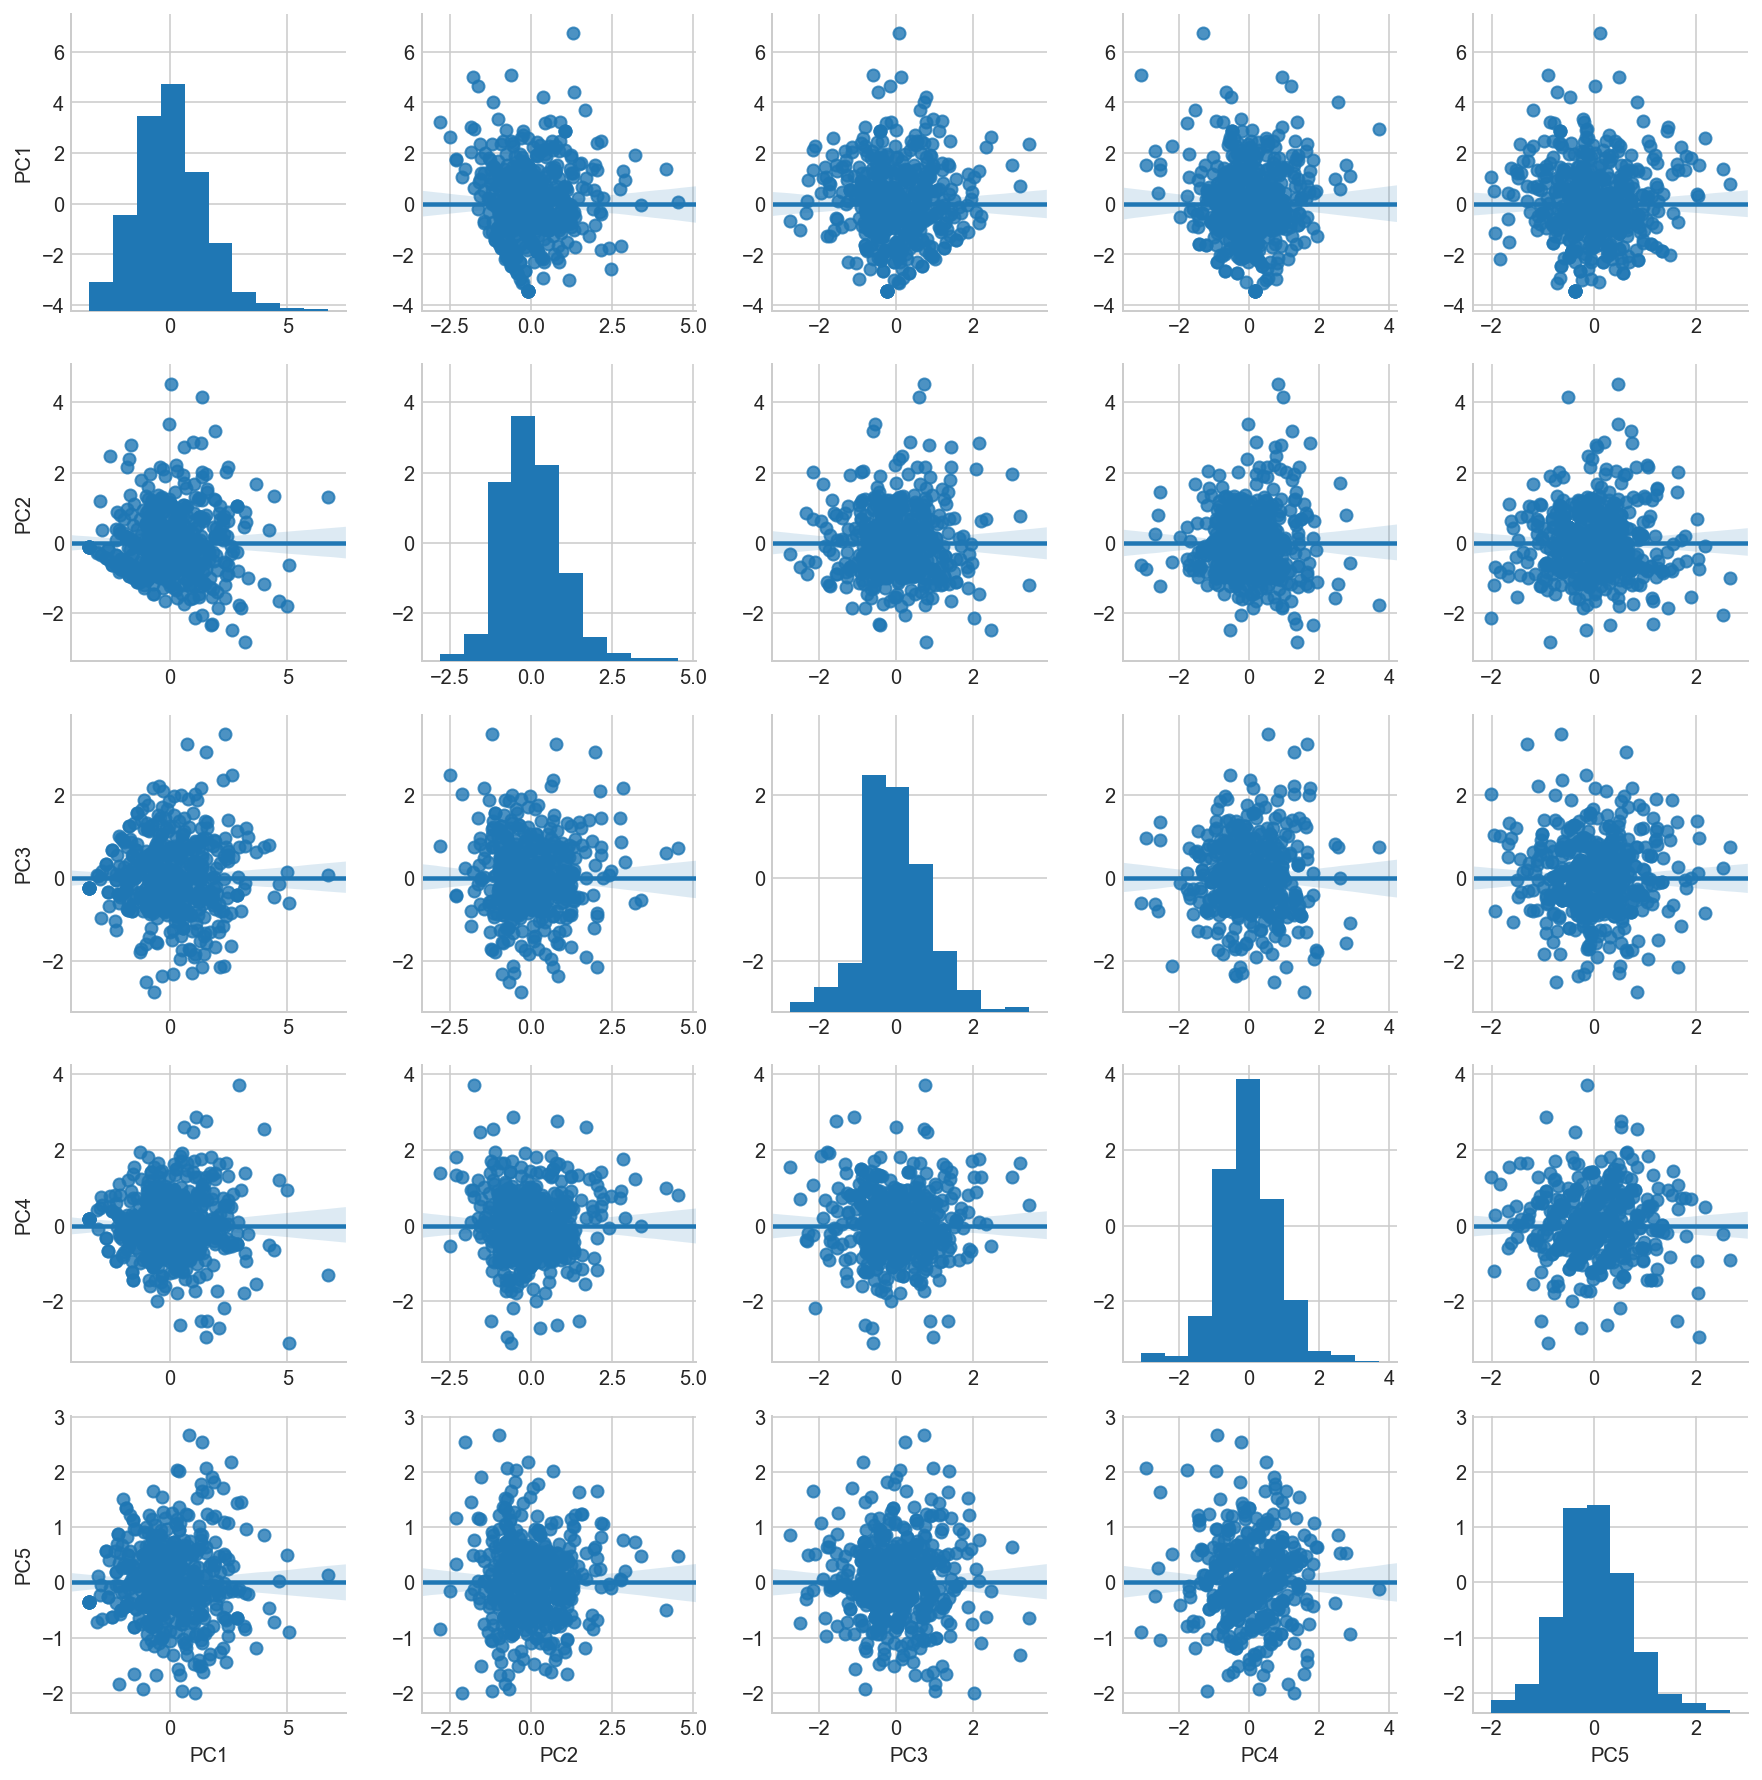

In [77]:
# A:
sns.pairplot(pd.DataFrame(subj_to_pcs, columns=['PC1','PC2','PC3','PC4','PC5']), kind='reg');

---

### 6.  OPTIONAL: How was the data transformed?

To demonstrate how the the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component PC1 manually.

#### 6.A. Pull out the eigenvector for PC1

In [80]:
# A:
confidence_weights = subj_components[0]

person1_original_ratings = subjective.iloc[0,:]
person1_pcas = subj_to_pcs[0,:]

#### 6.B. Create a dataframe showing the original values for the subjective variables for person 1

In [81]:
# A:
person1_original_ratings = subjective.iloc[0,:]

how_to_make_pc1 = pd.DataFrame({'person1_original': person1_original_ratings.values},
                               index=subjective.columns)
how_to_make_pc1

,person1_original
subjective_attractiveness,-0.786472
subjective_sincerity,-0.202716
subjective_intelligence,-0.354194
subjective_fun,0.193323
subjective_ambition,-0.323589


#### 6.C. Add the eigenvector for PC1: the weights to multiply each original variable by

Recall that each component is a linear combination of the original variables multiplied by a "weight" defined in the eigenvector of that component.

In [82]:
# A:
how_to_make_pc1['weights_to_make_pc1'] = confidence_weights
how_to_make_pc1

,person1_original,weights_to_make_pc1
subjective_attractiveness,-0.786472,-0.501894
subjective_sincerity,-0.202716,-0.315290
subjective_intelligence,-0.354194,-0.467071
subjective_fun,0.193323,-0.483864
subjective_ambition,-0.323589,-0.443187


#### 6.D. Multiply the original variable values by the eigenvector values

These are the "pieces" of principal component 1 that will be added together to make the new value for that person.

In [84]:
# A:
how_to_make_pc1['pieces_of_pc1_value'] = how_to_make_pc1.person1_original * how_to_make_pc1.weights_to_make_pc1
how_to_make_pc1

,person1_original,weights_to_make_pc1,pieces_of_pc1_value
subjective_attractiveness,-0.786472,-0.501894,0.394726
subjective_sincerity,-0.202716,-0.315290,0.063914
subjective_intelligence,-0.354194,-0.467071,0.165434
subjective_fun,0.193323,-0.483864,-0.093542
subjective_ambition,-0.323589,-0.443187,0.143410


#### 6.E. Sum the original values multiplied by the eigenvector weights to get person 1's value for PC1

In [85]:
# A:
print('sum of linear combinations of weights * original values for PC1:', np.sum(how_to_make_pc1.pieces_of_pc1_value))
print('person 1s pca variables:', person1_pcas)

sum of linear combinations of weights * original values for PC1: 0.6739420008503669
person 1s pca variables: [ 0.673942    0.03439955 -0.10382612 -0.35798348  0.57693667]


---

### 7. Fit PCA on the preference data

Now that you've seen how it's done, try it yourself!

- Find PCA eigenvalues and eigenvectors for the five `sd_like` columns
- Transform the original `sd_like` columns into the principal component space
- Verify these columns are uncorrelated

In [86]:
# A:
sd_like.columns

Index(['like_tvsports', 'like_sports', 'like_museums', 'like_theater',
       'like_shopping'],
      dtype='object')

#### 7.A. Find PCA eigenvalues and eigenvectors for the five `sd_like` columns

In [87]:
# A:
pref_pca = PCA(n_components=5)
pref_pca.fit(sd_like)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [89]:
# A:
pref_comp = pref_pca.components_

In [90]:
print(pref_pca.explained_variance_ratio_)
print('-------------------------------------\n')

print(sd_like.columns.values)
print('-------------------------------------\n')

for i, pc in enumerate(['PC1','PC2','PC3','PC4','PC5']):
    print(pc, 'weighting vector:', pref_comp[i])
    print('-------------------------------------\n')

[ 0.38165737  0.26823578  0.16433237  0.10400236  0.08177213]
-------------------------------------

['like_tvsports' 'like_sports' 'like_museums' 'like_theater'
 'like_shopping']
-------------------------------------

PC1 weighting vector: [ 0.32075311  0.43067013 -0.51328922 -0.57313168 -0.34596956]
-------------------------------------

PC2 weighting vector: [ 0.64992163  0.53219199  0.3241323   0.26506368  0.34504067]
-------------------------------------

PC3 weighting vector: [  2.08050622e-05  -1.60309917e-01  -4.54907251e-01  -2.24216382e-01
   8.46809977e-01]
-------------------------------------

PC4 weighting vector: [ 0.62245171 -0.58748868 -0.33822794  0.33335442 -0.20466461]
-------------------------------------

PC5 weighting vector: [ 0.29542035 -0.40056549  0.55689648 -0.66322181  0.0477206 ]
-------------------------------------



#### 7.B. Transform the original `sd_like` columns into the principal component space

In [91]:
pref_pcs = pref_pca.transform(sd_like)

In [92]:

pref_pcs[0:3]

array([[ 2.79296694, -1.38004224,  2.52358413, -1.19913853, -0.55974524],
       [-1.32313688, -1.20350178, -1.08780578,  0.55581634, -0.17650791],
       [-0.03464106,  0.13800827,  1.40113612,  1.70014738,  0.31672968]])

#### 7.C. Verify these columns are uncorrelated

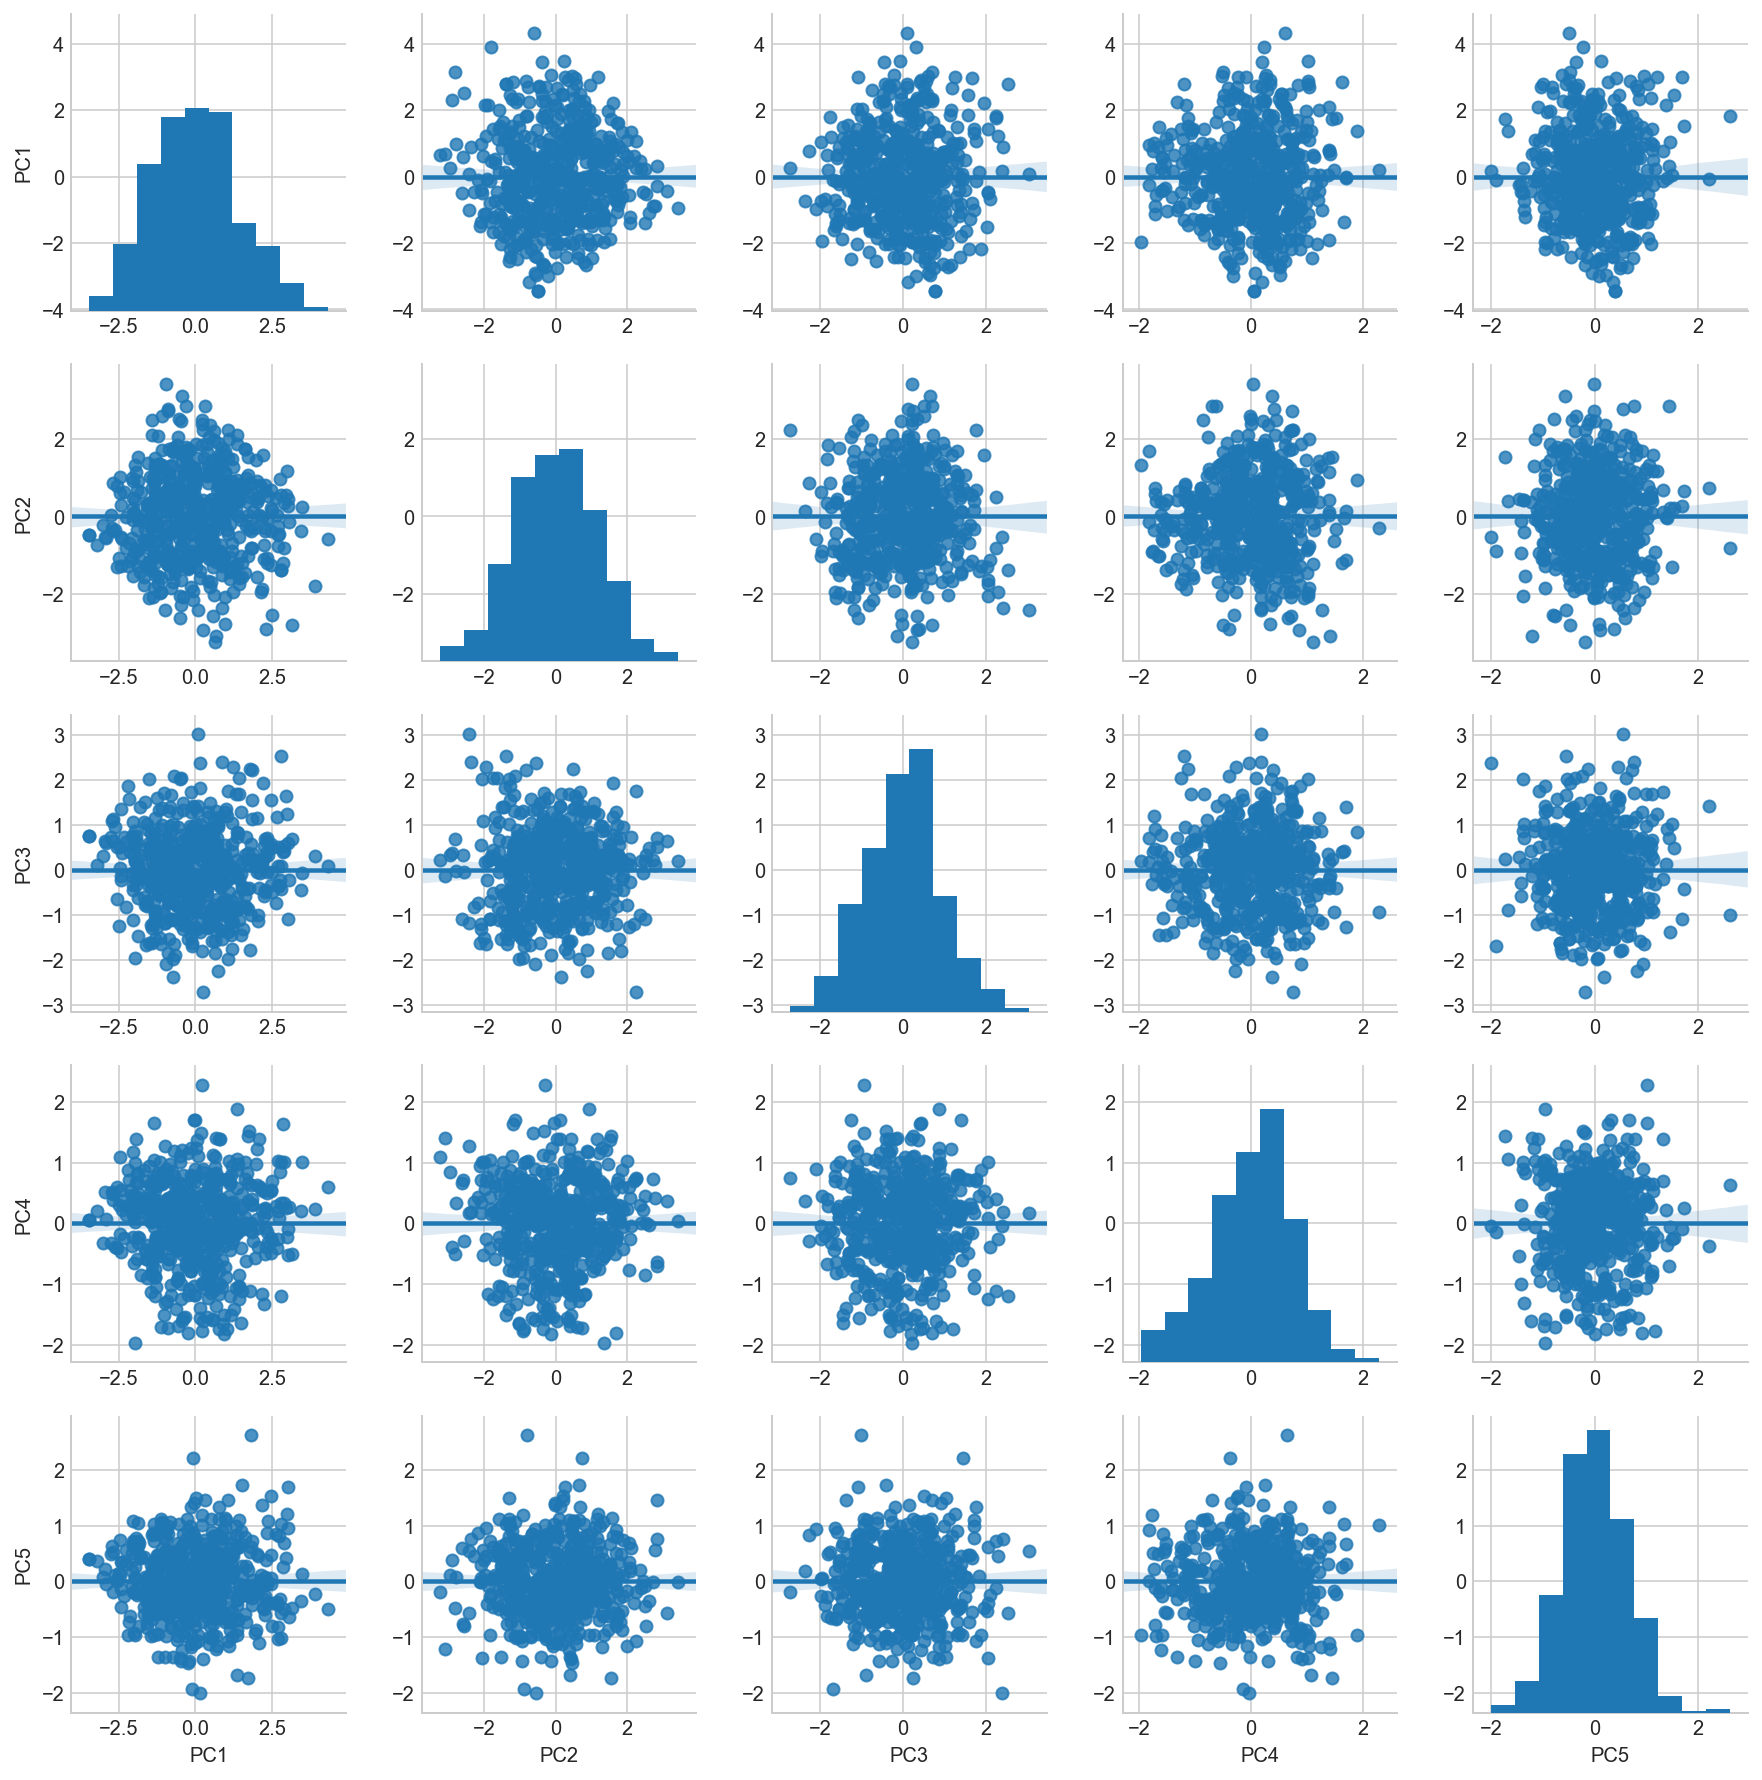

In [93]:
# A:
sns.pairplot(pd.DataFrame(pref_pcs, columns=['PC1','PC2','PC3','PC4','PC5']), kind='reg')

---

### 8. Use PCA for dimensionality reduction

Using linear regression, let's predict whether a user likes reading!

**The key question: ** Can we get the same prediction accuracy using only the first three principal components as features, versus using all five original values as features?

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reading = sd['like_reading'].values

#### 8.A. Linear regression cross-validated on original variables (`sd_like.values`)

- What is the mean cross val score?
- Keep in mind that Linear Regression uses error for score -- so zero is the ideal score!

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
# A:
linreg = LinearRegression()
original_scores = cross_val_score(linreg, sd_like.values, reading, cv=10)
print(sd_like.columns.values)
print(original_scores)
print(np.mean(original_scores))

['like_tvsports' 'like_sports' 'like_museums' 'like_theater'
 'like_shopping']
[ 0.0572145  -0.10260757  0.20705881 -0.02153198  0.05578277  0.03202637
  0.14161886  0.22415082  0.116138    0.16539735]
0.0875247930476


#### 8.B. Linear regression on first principal component

- What is the mean cross val score?

In [99]:
# A:
linreg.fit(sd_like.values, reading)
for coef, var in zip(linreg.coef_, sd_like.columns):
    print(var, coef)

like_tvsports -0.178971032959
like_sports -0.125419714038
like_museums 0.64197334864
like_theater 0.155816034563
like_shopping -0.199148764822


#### 8.C. Linear regression on first 3 principal components

- What is the mean cross val score?

In [100]:
# A:
pref_pcs[:,0:1].shape

(542, 1)

---

**Check yourself**. The mean cross val score should be nearly the same for the first 3 principal components as it was on the 5-component original data!